In [1]:
#setup
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import random

print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

PyTorch Version: 2.0.1
cpu


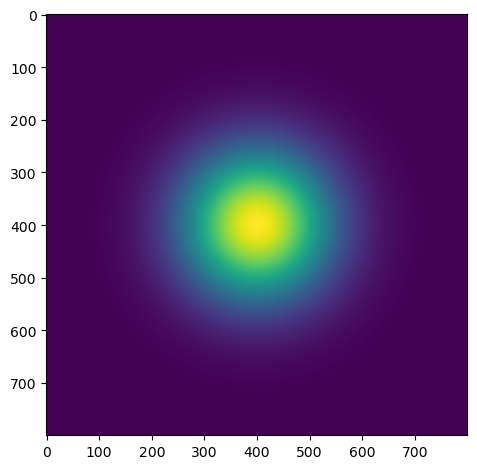

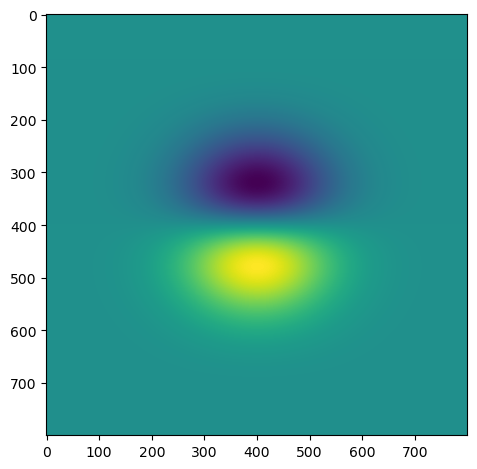

In [2]:
#Part 1
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
x = torch.tensor(X)
y = torch.tensor(Y)

x = x.to(device)
y = y.to(device)


z = torch.exp(-(x**2+y**2)/2.0)


x = torch.sin(x)
y = torch.sin(y)
plt.imshow(z.numpy())
plt.tight_layout()
plt.show()

z = z * torch.sin(x)

plt.imshow(z.numpy())
plt.tight_layout()
plt.show()


/tmp/ipykernel_405/23297288.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


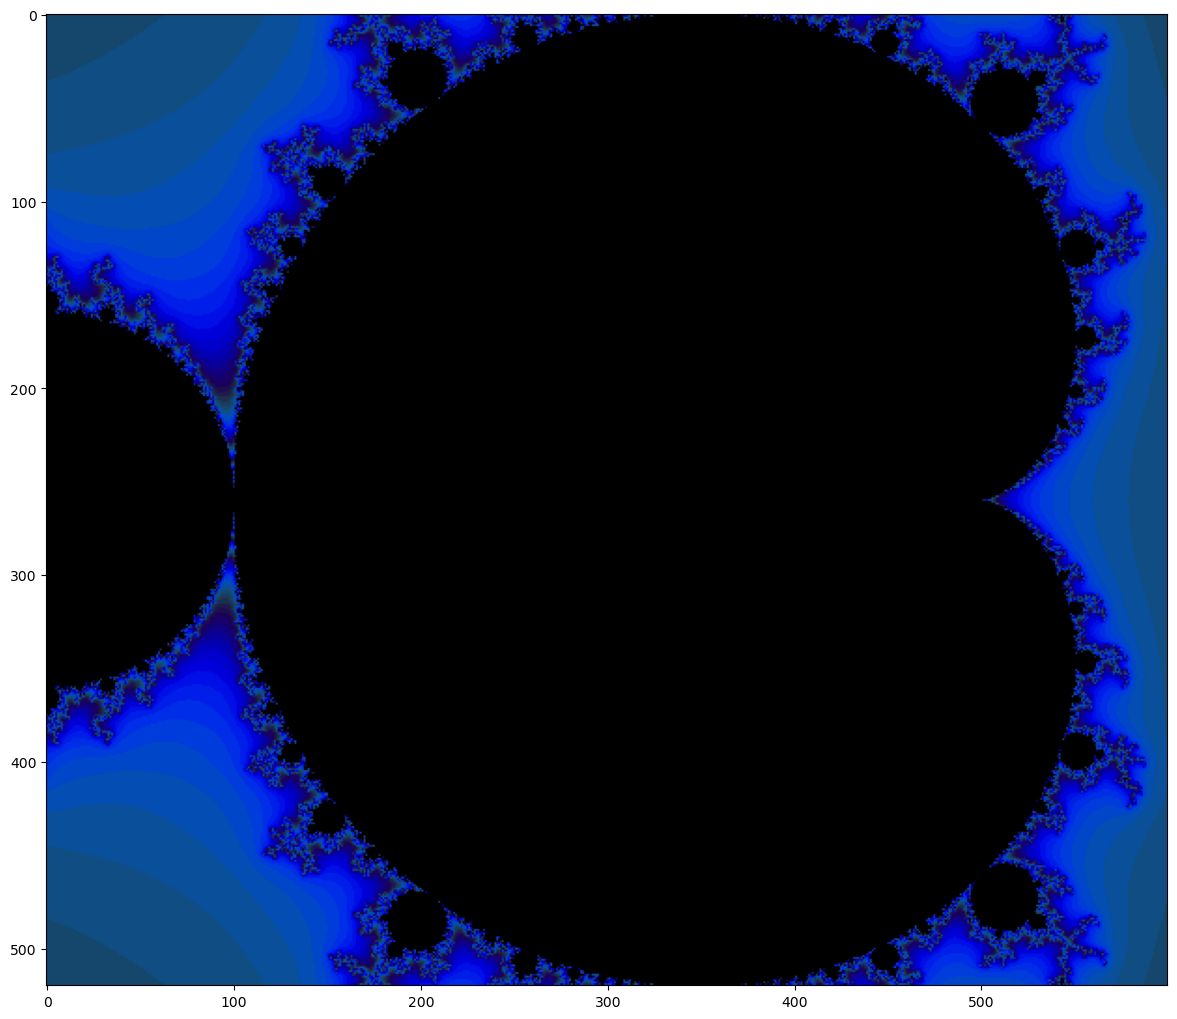

In [3]:
# Part 2

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X) / 2
y = torch.Tensor(Y) / 2
z = torch.complex(x, y) #important!
# zs = torch.zeros_like(z) error
zs = z

ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)


for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_

fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_405/1038297705.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


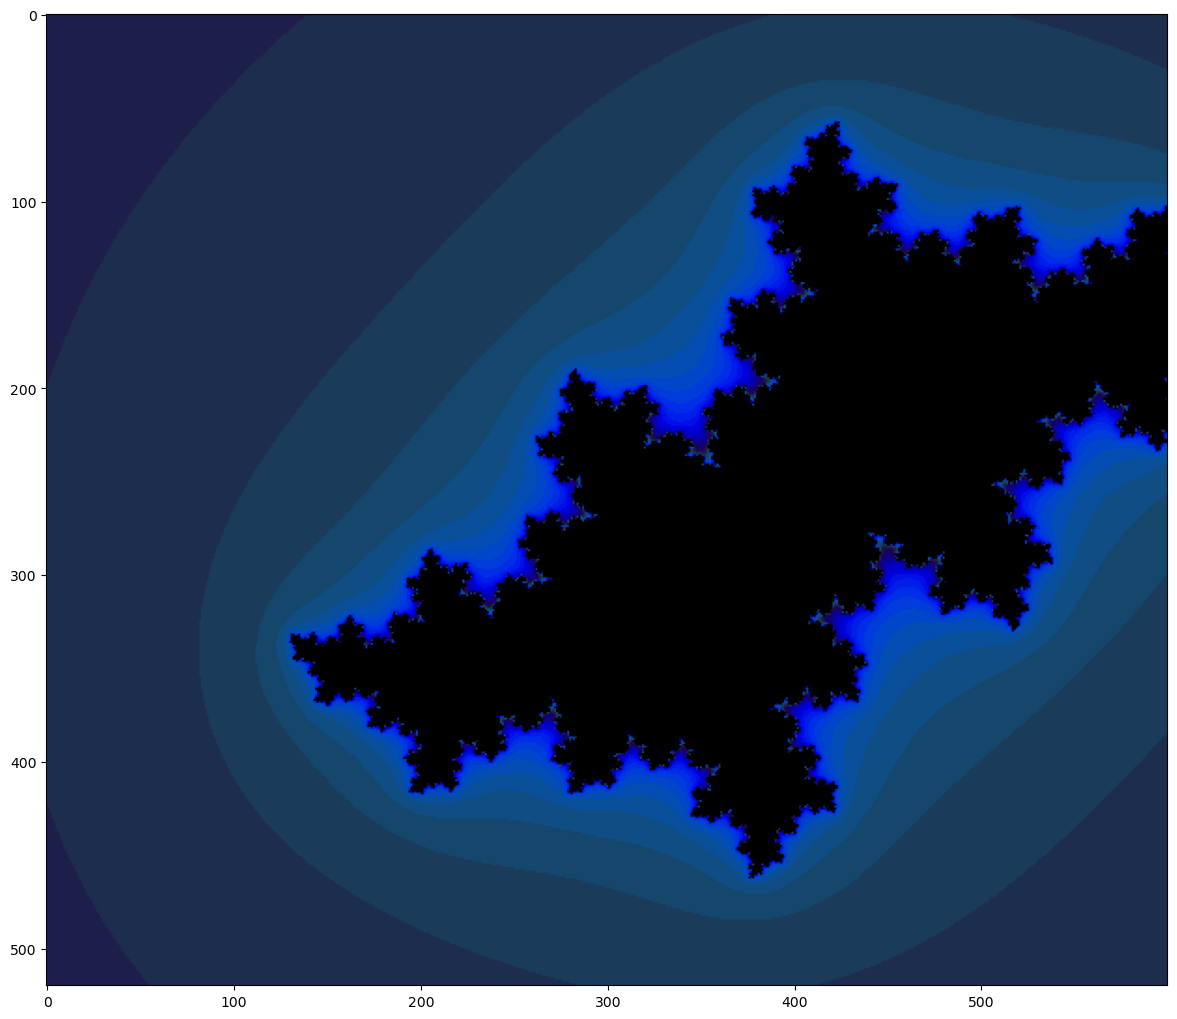

In [5]:
# Part 2

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
# zs = torch.zeros_like(z) error
zs = z

ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Let c be a constant value to determine which zs values will diverge
c = -0.34 + 0.6j

for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + c
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged.type(torch.FloatTensor)
    zs = zs_

fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

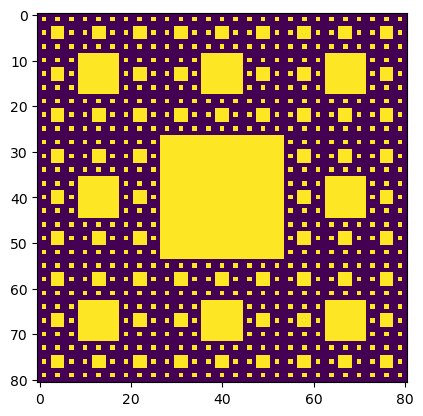

In [32]:
X = np.array([[0,0,0], [0,1,0],[0,0,0]])
x = torch.Tensor(X)

iterations = 3
for i in range(iterations):
    base = torch.cat((x, x, x), dim=1)
    size = x.size(1)
    centre = torch.ones(size, size)
    middle = torch.cat((x, centre, x) , dim=1)
    x = torch.cat((base, middle, base), dim=0)

plt.imshow(x, cmap='viridis')

(3.0, 6.0)

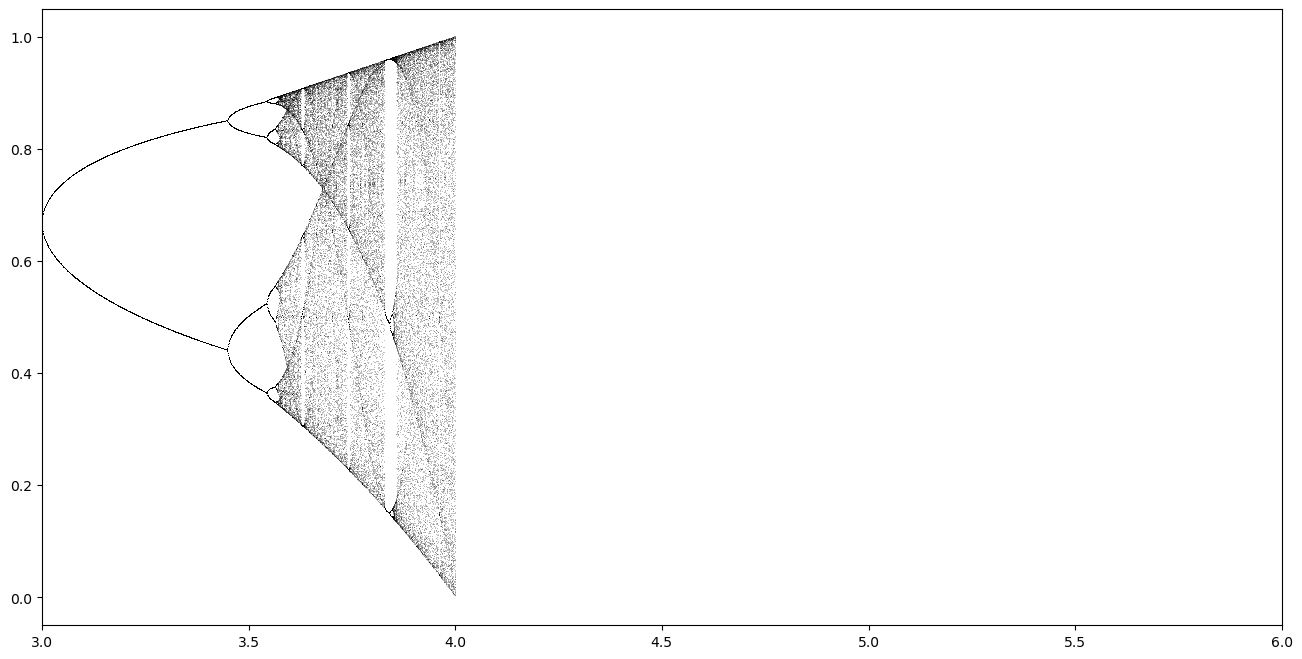

In [2]:
N = 1000
last = 100
lambdaSteps = 5000
Lambdas = np.linspace(0.6, 5.0, lambdaSteps)
x = torch.Tensor(Lambdas)
y = torch.Tensor(0.5 * np.ones_like(Lambdas))
x = x.to(device)
y = y.to(device)
fig = plt.figure(figsize=(16,8))

for i in np.arange(N):
    y = x * y * (1 - y)
    #y = logistic(Lambdas, y)
    
    if i >= (N-last):
      plt.plot(Lambdas, y.numpy(), ",k", alpha=0.25)
      
plt.xlim(3,6)